# Neccessary Imports for this Notebook

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Playing Around

- We are importing the iris dataset
- Initializing the DecisionTreeClassifier with **max_depth = 2**
    

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

iris = load_iris()


X = iris.data[:,2:]
Y = iris.target

classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Visualization
let's Visualize how our Decision Tree with **max_depth=2** has built its nodes , how many splits has been made.

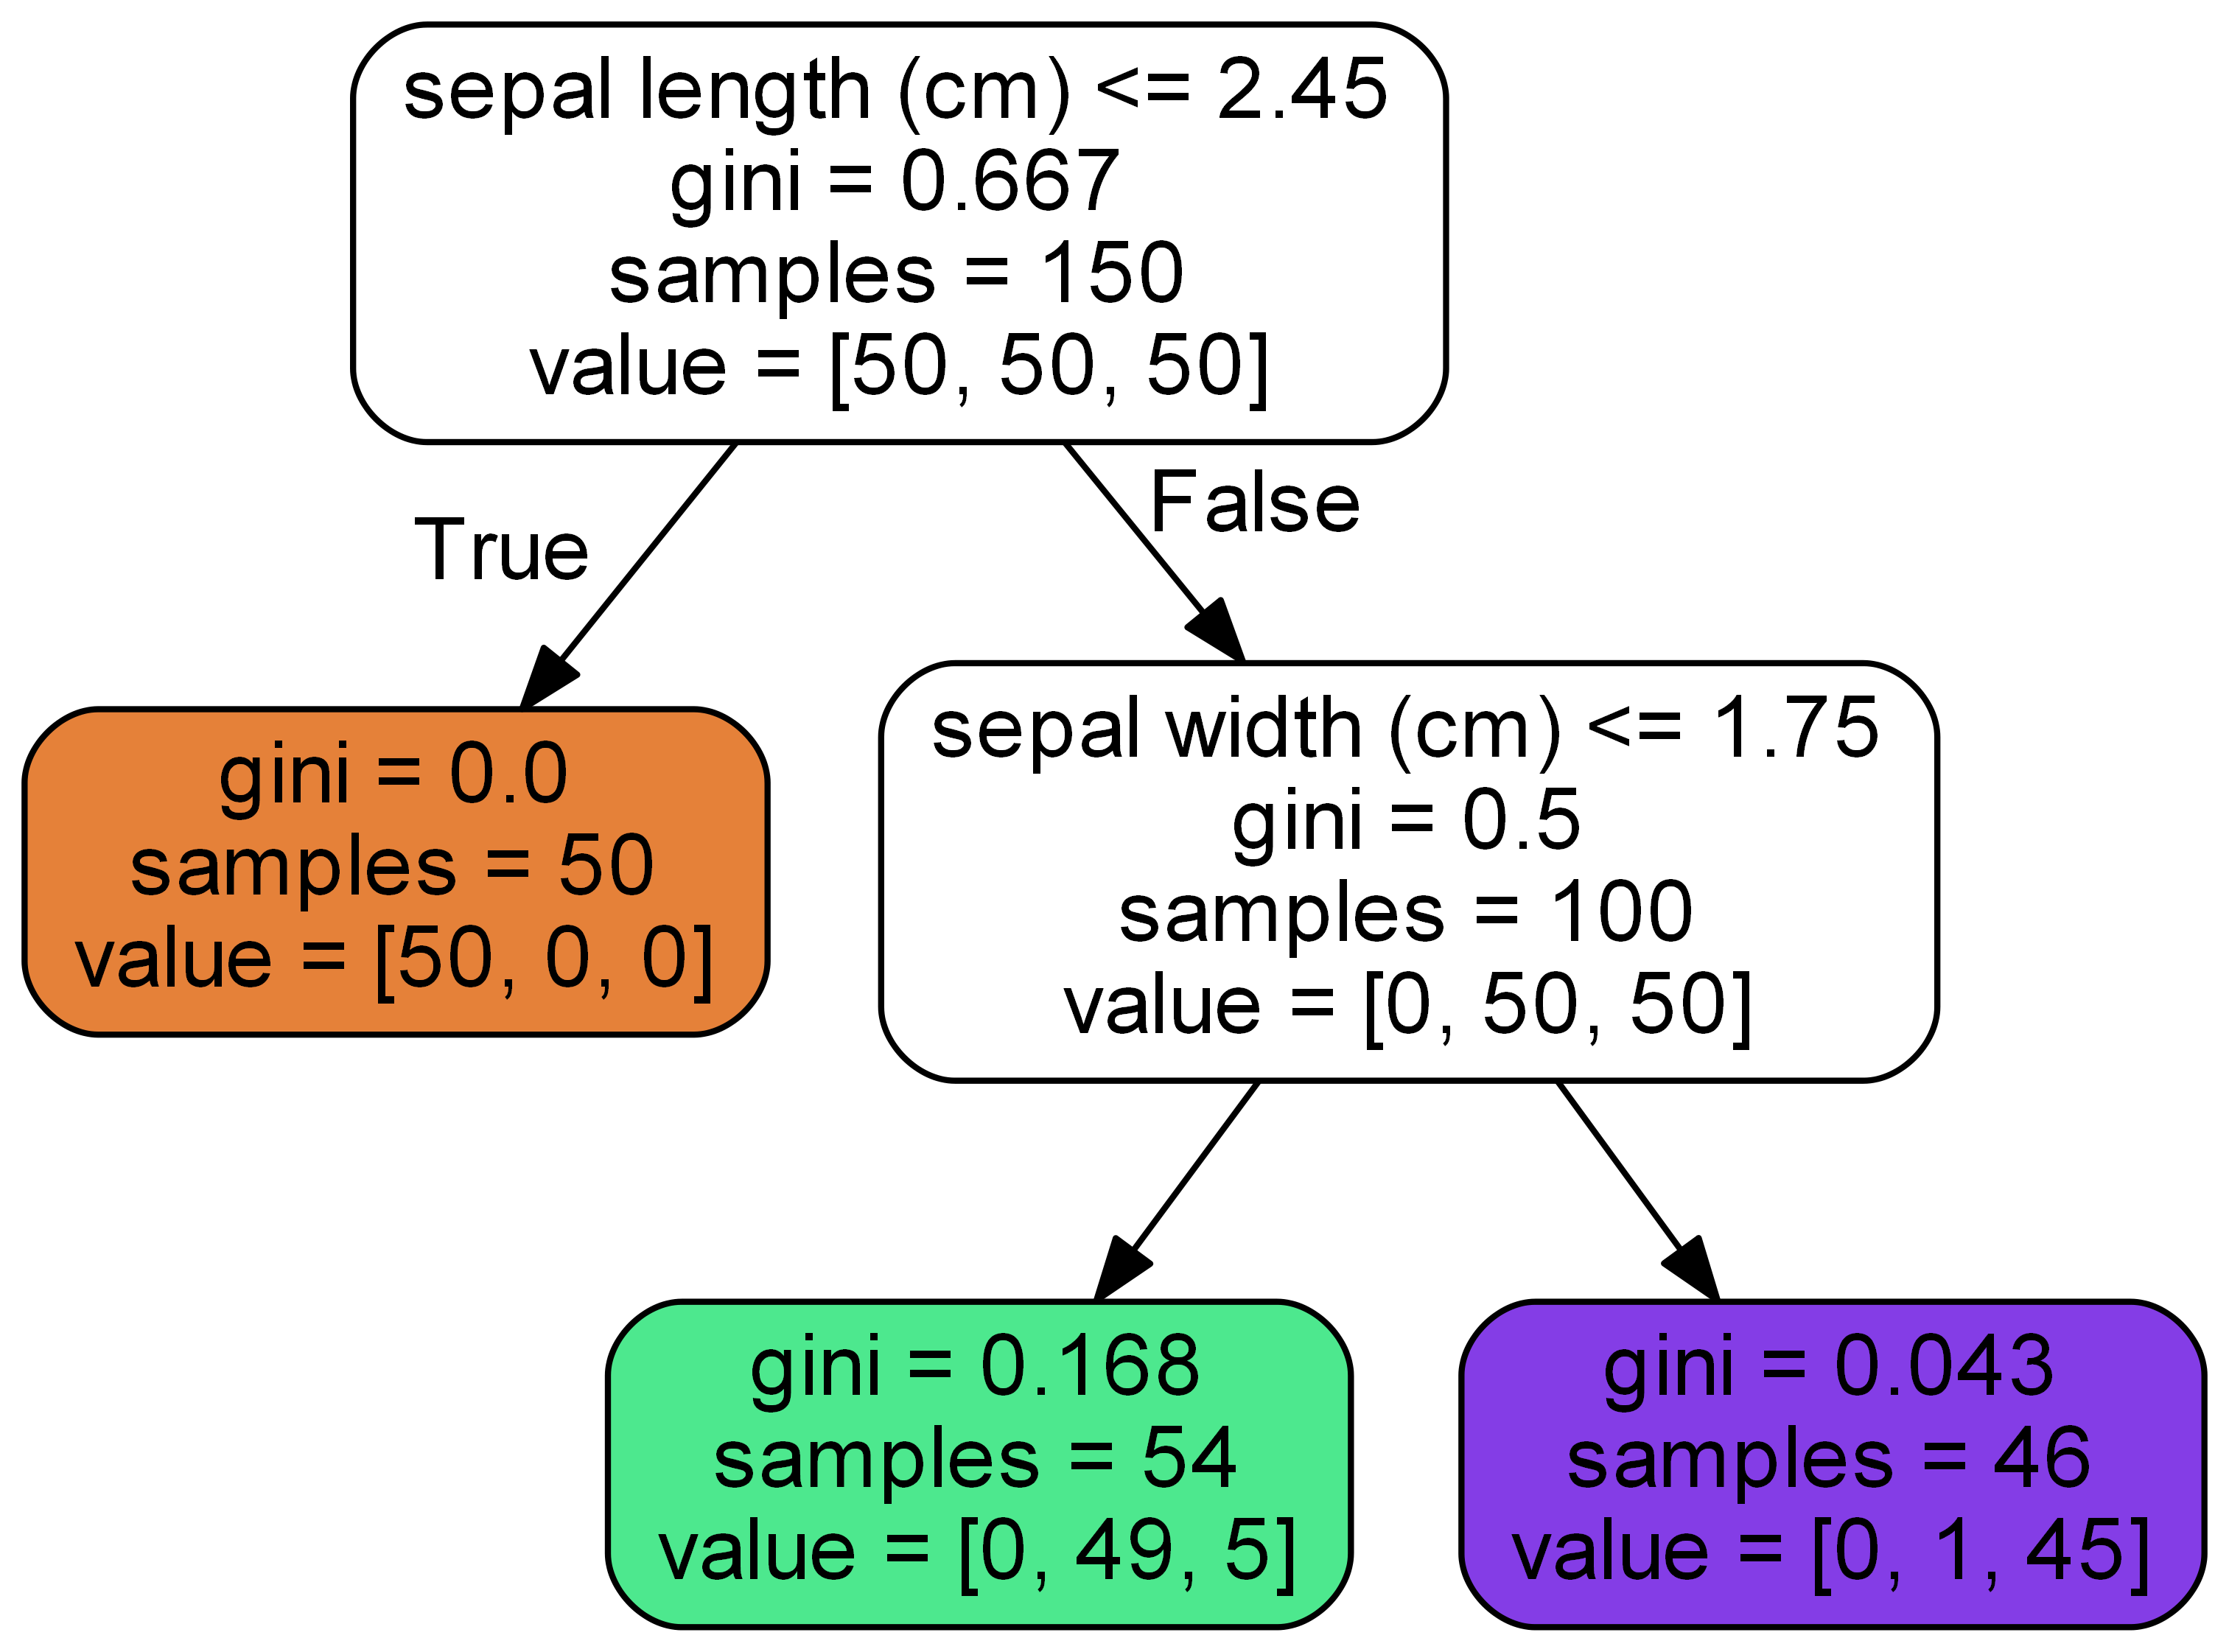

In [3]:
from sklearn.tree import export_graphviz
from IPython.display import Image


features = iris.feature_names
features = features[:2]

export_graphviz(classifier, out_file='tree.dot' , feature_names = features , filled=True , rounded=True  )

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename="tree.png")

# Plotting

Let's plot our data points and see how our data point looks in graph with Difference in target names (Setosa , Versicolor , Virginica) . Now we can 

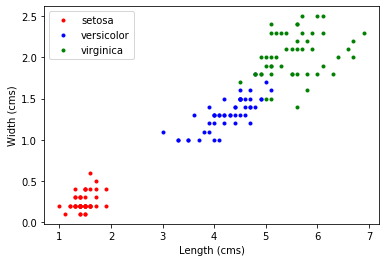

In [4]:
setosa = X[Y==0]
versicolor = X[Y==1]
virginica = X[Y==2]

plt.plot(setosa[:,0] , setosa[:,1] , 'r.', label="setosa")
plt.plot(versicolor[:,0] , versicolor[:,1], 'b.' , label="versicolor")
plt.plot(virginica[:,0] , virginica[:,1], 'g.' , label="virginica")

plt.legend()

plt.xlabel('Length (cms)')
plt.ylabel('Width (cms)')

plt.show()

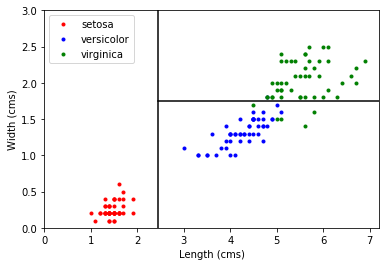

In [5]:
plt.plot(setosa[:,0] , setosa[:,1] , 'r.', label="setosa")
plt.plot(versicolor[:,0] , versicolor[:,1], 'b.' , label="versicolor")
plt.plot(virginica[:,0] , virginica[:,1], 'g.' , label="virginica")

plt.legend()

plt.xlabel('Length (cms)')
plt.ylabel('Width (cms)')

plt.plot([2.45, 2.45] , [0,3] , 'k-')
plt.plot([2.45,7.2] , [1.75,1.75] , 'k-')

plt.axis( [0,7.2 ,0,3] ) #left, bottom, width, height

plt.show()

In [6]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

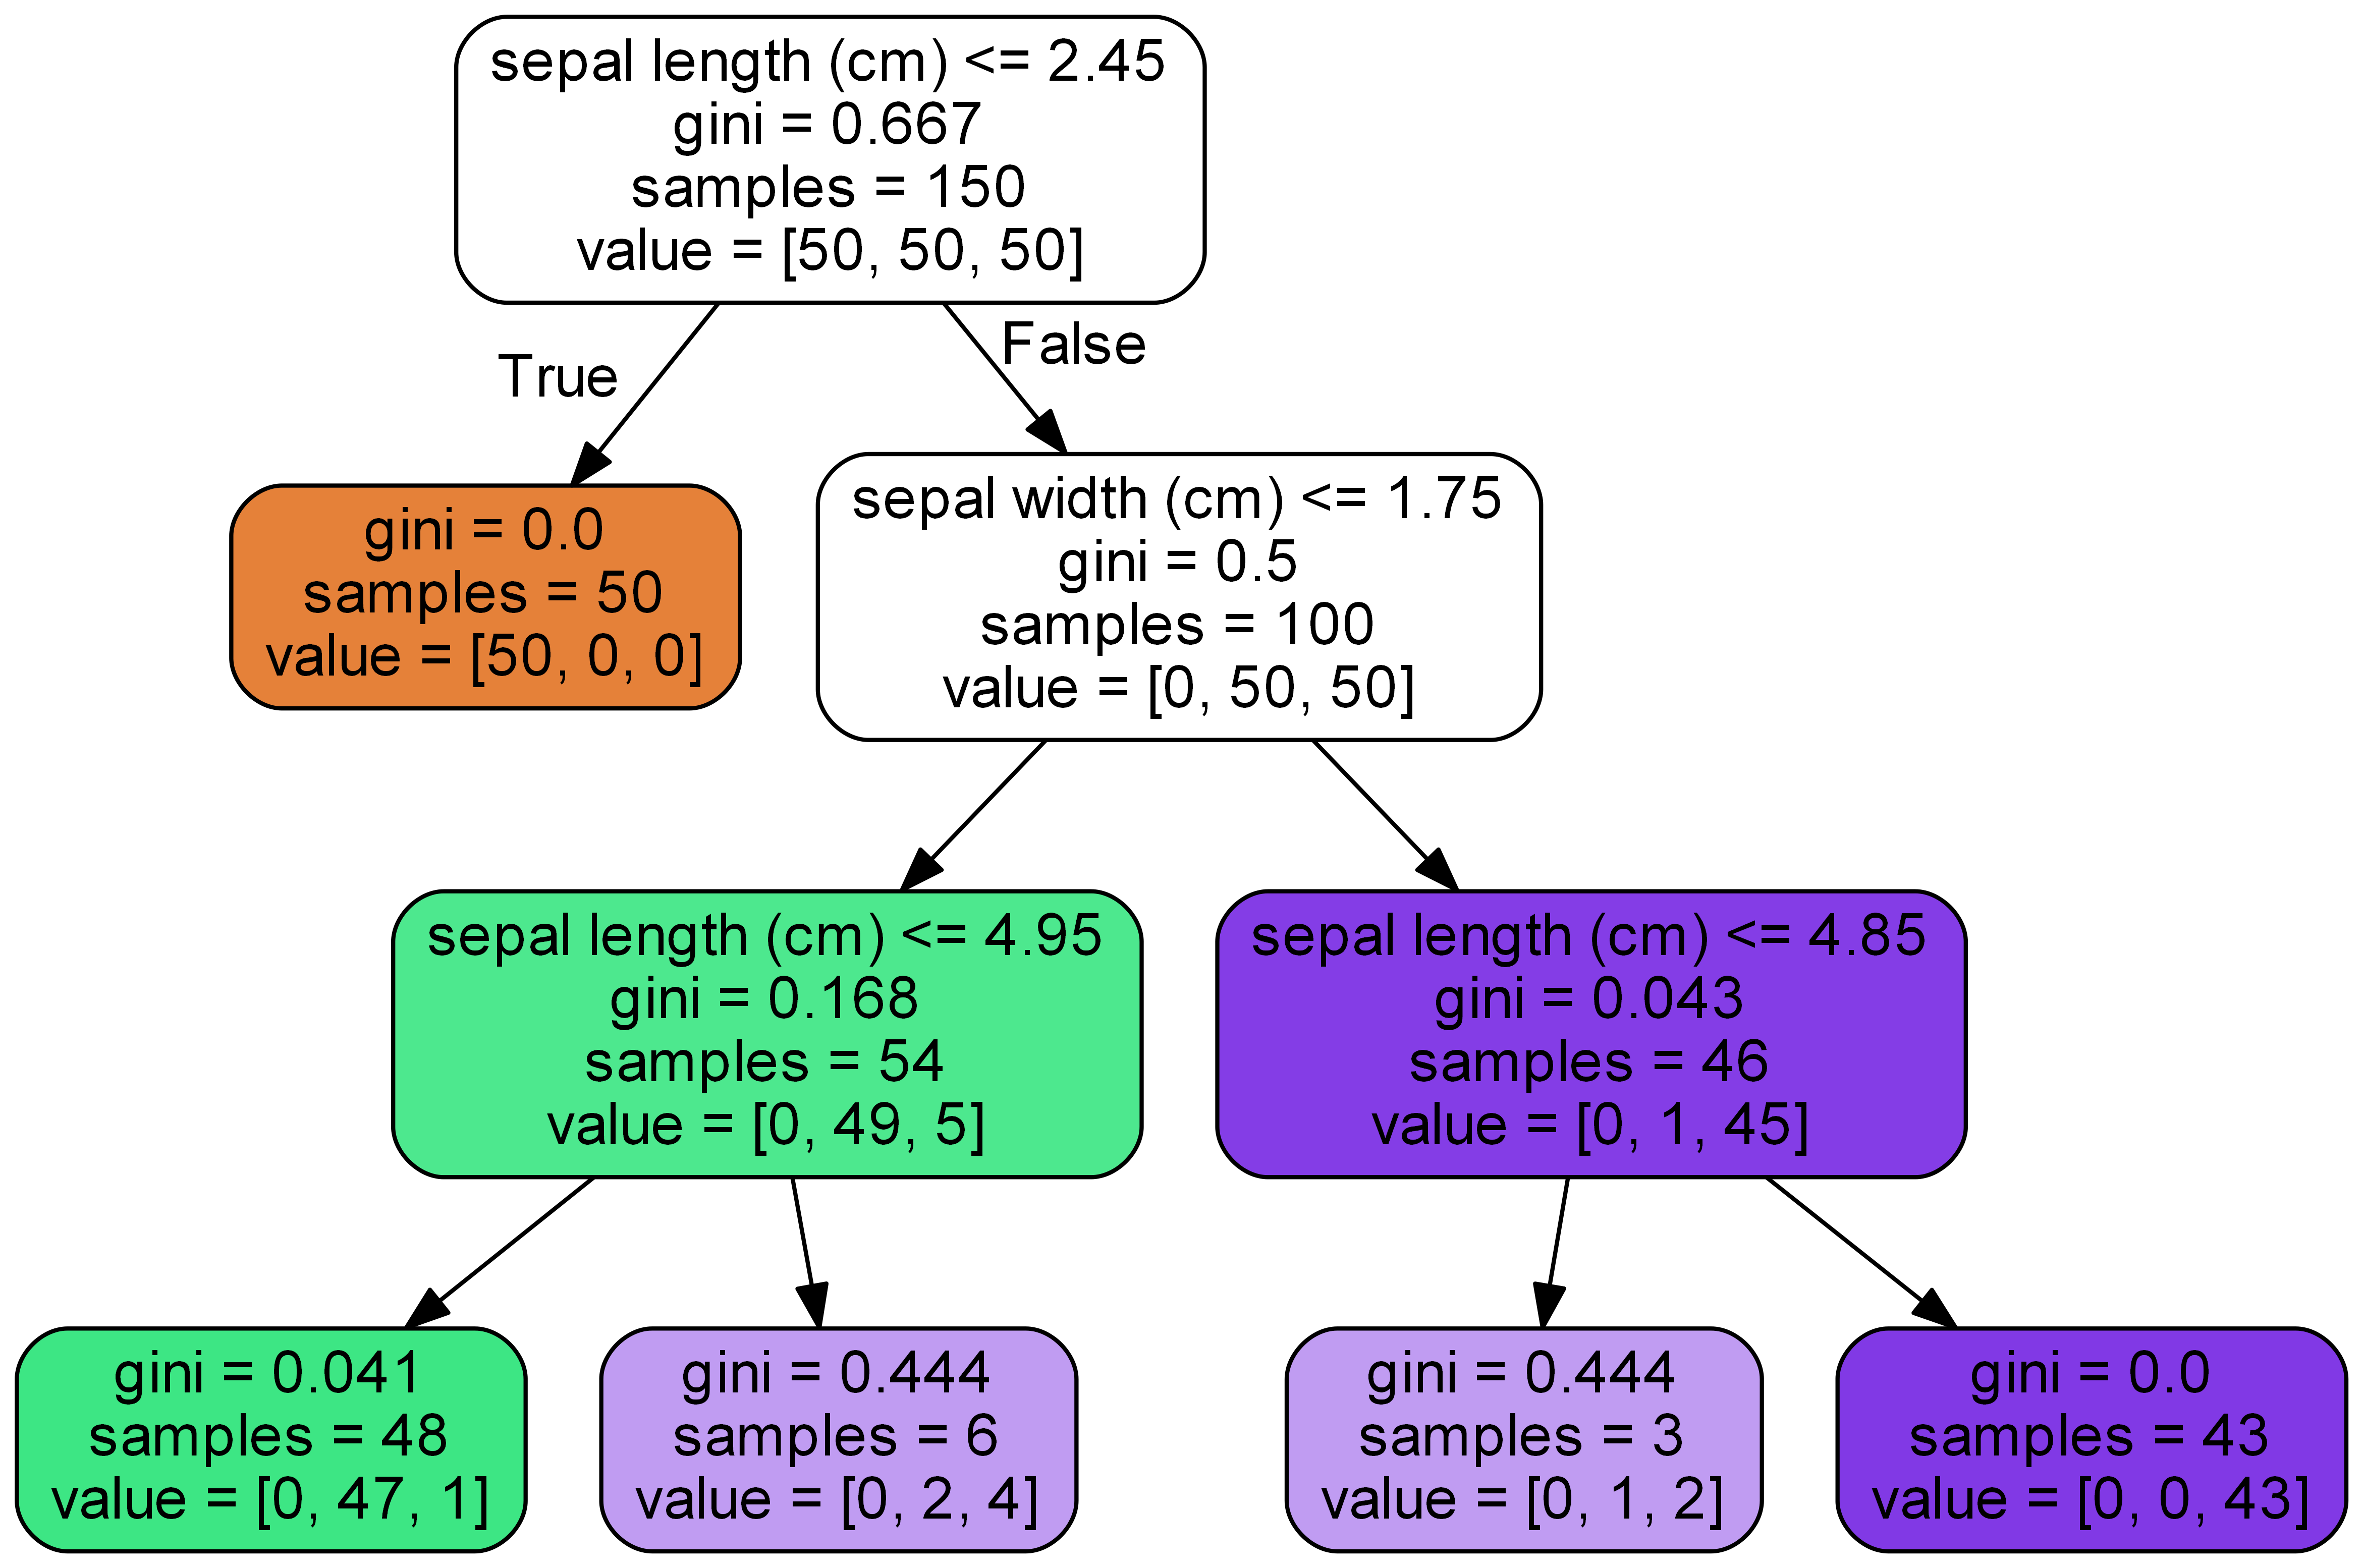

In [7]:
from sklearn.tree import export_graphviz
from IPython.display import Image


features = iris.feature_names
features = features[:2]

export_graphviz(classifier, out_file='tree.dot' , feature_names = features , filled=True , rounded=True  )

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename="tree.png")

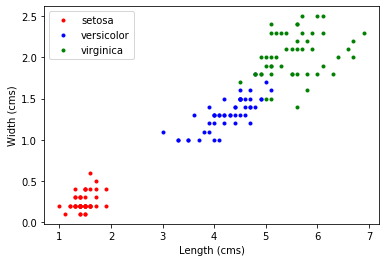

In [8]:
setosa = X[Y==0]
versicolor = X[Y==1]
virginica = X[Y==2]

plt.plot(setosa[:,0] , setosa[:,1] , 'r.', label="setosa")
plt.plot(versicolor[:,0] , versicolor[:,1], 'b.' , label="versicolor")
plt.plot(virginica[:,0] , virginica[:,1], 'g.' , label="virginica")

plt.legend()

plt.xlabel('Length (cms)')
plt.ylabel('Width (cms)')

plt.show()

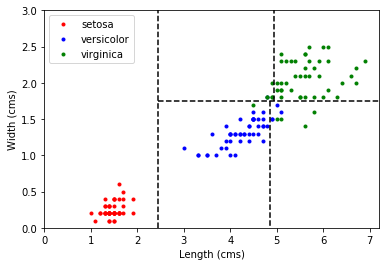

In [9]:



plt.plot(setosa[:,0] , setosa[:,1] , 'r.', label="setosa")
plt.plot(versicolor[:,0] , versicolor[:,1], 'b.' , label="versicolor")
plt.plot(virginica[:,0] , virginica[:,1], 'g.' , label="virginica")

plt.legend()

plt.xlabel('Length (cms)')
plt.ylabel('Width (cms)')

plt.plot([2.45, 2.45] , [0,3] , 'k--')
plt.plot([2.45,7.2] , [1.75,1.75] , 'k--')
plt.plot([4.95,4.95],[1.75,3],'k--')
plt.plot([4.85,4.85],[1.75,0],'k--')

plt.axis( [0,7.2 ,0,3] ) #left, bottom, width, height

plt.show()

This time we'll use **moon's dataset** for classification with different parameters , restrictions
- min_samples_leaf (n=4) The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. If int, then consider min_samples_leaf as the minimum number.If float, then min_samples_leaf is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node.

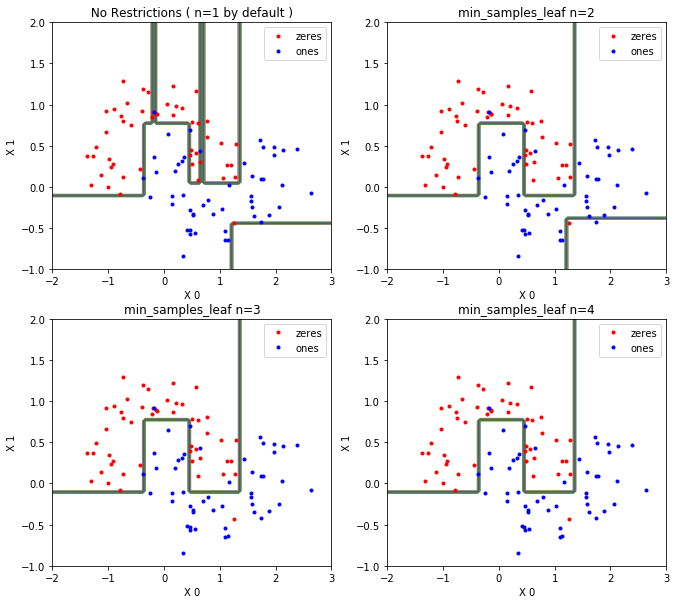

In [10]:
from sklearn.datasets import make_moons # importing moon dataset
from math import ceil
from matplotlib.colors import ListedColormap

def plot_boundary(clf, X , Y , axes , title=""):
    
    zeros = X[Y==0]
    ones = X[Y==1]

    plt.plot(zeros[:,0] , zeros[:,1] , 'r.', label="zeres")
    plt.plot(ones[:,0] , ones[:,1], 'b.' , label="ones")
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)

    x1, x2 = np.meshgrid(x1s, x2s)
    
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    
    plt.contour(x1, x2, y_pred, cmap=custom_cmap , alpha=0.8)

    plt.legend()

    plt.xlabel('X 0')
    plt.ylabel('X 1')
    
    plt.title(title)


plt.subplots(figsize = (11,10))

X , Y = make_moons(n_samples=100, noise=0.25, random_state=53)

axes = [ 
         round(np.amin(X[:,0])-0.25), 
         round(np.amax(X[:,0])+0.25),
         round(np.amin(X[:,1])-0.25),
         round(np.amax(X[:,1])+0.25)
       ]

classifier = DecisionTreeClassifier(random_state=42)
    
classifier.fit(X,Y)

plt.subplot(221)

plot_boundary( classifier , X , Y , axes , " No Restrictions ( n=1 by default ) " )

classifier = DecisionTreeClassifier(min_samples_leaf=2 , random_state=42)

classifier.fit(X,Y)

plt.subplot(222)

plot_boundary( classifier , X , Y , axes , "min_samples_leaf n=2")

classifier = DecisionTreeClassifier(min_samples_leaf=3 , random_state=42)

classifier.fit(X,Y)

plt.subplot(223)

plot_boundary( classifier , X , Y , axes , "min_samples_leaf n=3")

classifier = DecisionTreeClassifier(min_samples_leaf=4 , random_state=42)

classifier.fit(X,Y)

plt.subplot(224)

plot_boundary( classifier , X , Y , axes , "min_samples_leaf n=4")

plt.show()




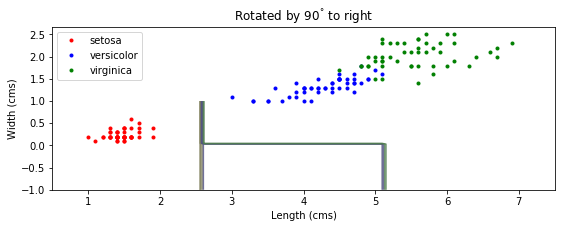

In [11]:
angle = np.pi / 180 * 20

X = iris.data[:,2:]
Y = iris.target

axes = [ 
         round(np.amin(X[:,0])-0.25), 
         round(np.amax(X[:,0])+0.25),
         round(np.amin(X[:,1])-0.25),
         round(np.amax(X[:,1])+0.25)
       ]

rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, Y)

plt.subplots(figsize=(9, 3))

setosa = X[Y==0]
versicolor = X[Y==1]
virginica = X[Y==2]

axes=[0.5, 7.5, -1.0, 1]

x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)

x1, x2 = np.meshgrid(x1s, x2s)
    
X_new = np.c_[x1.ravel(), x2.ravel()]

y_pred = tree_clf_r.predict(X_new).reshape(x1.shape)

custom_cmap = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    
plt.contour(x1, x2, y_pred, cmap=custom_cmap , alpha=0.8)

plt.plot(setosa[:,0] , setosa[:,1] , 'r.', label="setosa")
plt.plot(versicolor[:,0] , versicolor[:,1], 'b.' , label="versicolor")
plt.plot(virginica[:,0] , virginica[:,1], 'g.' , label="virginica")

plt.legend()

plt.xlabel('Length (cms)')
plt.ylabel('Width (cms)')
plt.title('Rotated by $90^\degree$ to right ')

plt.show()

# Regression

In [12]:

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

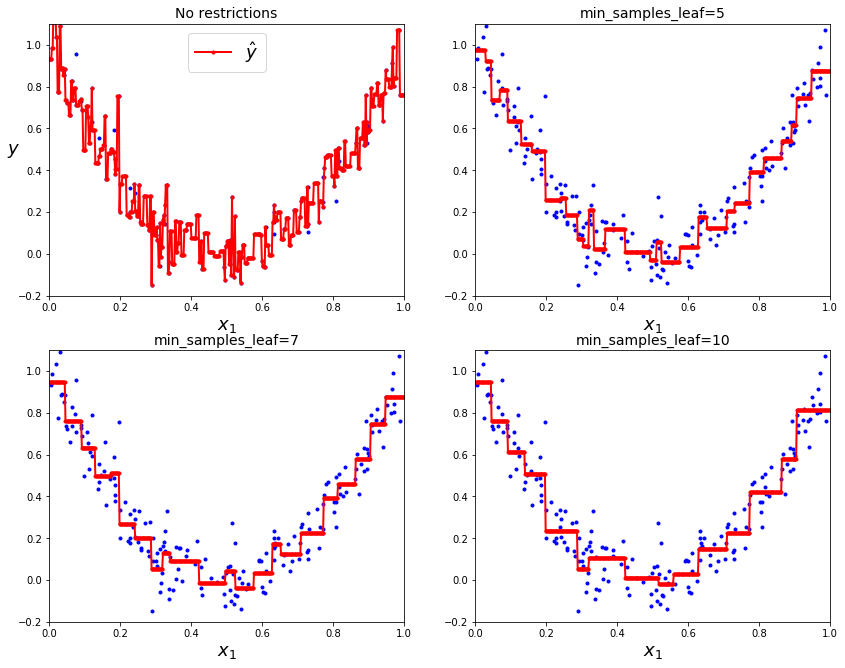

In [13]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)

y_pred= tree_reg.predict(x1)

plt.subplots(figsize=(14, 11))

plt.subplot(221)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)
tree_reg.fit(X, y)
y_pred = tree_reg.predict(x1)

plt.subplot(222)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg.min_samples_leaf), fontsize=14)


tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=7)
tree_reg.fit(X, y)
y_pred = tree_reg.predict(x1)

plt.subplot(223)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg.min_samples_leaf), fontsize=14)

tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg.fit(X, y)
y_pred = tree_reg.predict(x1)

plt.subplot(224)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg.min_samples_leaf), fontsize=14)

plt.show()

# Challenges

In [14]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# importing 10000 samples with noise=0.4

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# spliting the features & targets with 80% for training , 20% for testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# for finding the best params , which we want to search 

params = { 
    'max_depth' : list(range(1,10)), 
    'min_samples_split' : [2,3,4] , 
    'criterion':['gini','entropy'] ,
    'min_samples_leaf' : list(range(X.shape[1] , X.shape[1]+4) )
         }
grid_search = GridSearchCV( DecisionTreeClassifier(random_state=42) , params , n_jobs = -1 , verbose=1 , cv=3 )
grid_search.fit(X_train , y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:    4.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              

In [15]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [16]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_pred,y_test)

0.8635